In [1]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from time import time
import sys, os

In [2]:
DIR_TEST = './data/test'
DIR_TEST_IMAGES = "./data/test/images"

In [3]:
df_predictions = pd.read_csv('pred_test.csv')

In [4]:
df_predictions

,file_name,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,...,Point_M189_X,Point_M189_Y,Point_M190_X,Point_M190_Y,Point_M191_X,Point_M191_Y,Point_M192_X,Point_M192_Y,Point_M193_X,Point_M193_Y
0,296814969_3.jpg,280,397,283,411,287,418,291,432,294,...,378,320,389,320,400,320,407,323,418,323
1,2968560214_1.jpg,669,518,661,542,661,566,653,598,645,...,530,371,506,371,490,379,466,379,450,379
2,2968784797_1.jpg,433,1788,433,1869,2443,1937,2416,1991,2416,...,945,1235,2025,1154,1971,1181,1917,1208,1836,1208
3,296961468_1.jpg,835,1471,835,1512,842,1552,856,1593,869,...,1201,1166,1242,1166,1283,1166,1323,1180,1378,1180
4,2970690152_2.jpg,1029,766,1029,785,1022,805,1016,824,1016,...,895,613,882,613,863,613,850,613,837,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,3260548295_1.jpg,1163,906,1149,920,1149,941,1134,963,1120,...,1106,730,1099,723,1070,723,1052,716,1038,716
326,3260548295_2.jpg,350,463,350,472,350,489,350,502,354,...,393,379,406,379,412,379,421,383,430,383
327,3261640996_1.jpg,570,787,577,809,584,830,591,858,599,...,681,634,702,634,723,634,738,634,752,634
328,3262777136_1.jpg,429,357,425,369,421,381,421,396,417,...,368,266,357,266,345,270,337,270,326,274


In [5]:
test_points = pd.read_csv(os.path.join(DIR_TEST, 'test_points.csv'))

In [6]:
test_points

,filename,point_index_list
0,296814969_3.jpg,"[20, 160, 1, 77, 158, 101, 131, 165, 68, 68, 4..."
1,2968560214_1.jpg,"[10, 93, 48, 129, 155, 108, 70, 111, 58, 116, ..."
2,2968784797_1.jpg,"[83, 49, 133, 94, 186, 137, 170, 139, 69, 182,..."
3,296961468_1.jpg,"[134, 104, 81, 175, 133, 38, 136, 12, 114, 9, ..."
4,2970690152_2.jpg,"[192, 192, 191, 130, 5, 44, 59, 58, 105, 63, 1..."
...,...,...
325,3260548295_1.jpg,"[137, 7, 83, 11, 113, 128, 124, 134, 156, 176,..."
326,3260548295_2.jpg,"[149, 107, 153, 184, 112, 87, 60, 186, 150, 18..."
327,3261640996_1.jpg,"[121, 70, 29, 46, 28, 161, 32, 56, 47, 156, 16..."
328,3262777136_1.jpg,"[7, 118, 89, 34, 8, 149, 84, 49, 96, 115, 15, ..."


In [30]:
for idx, row in df_predictions.iterrows():    
    COUNT_POINTS = 194
    print(row['file_name'])
    img = Image.open(os.path.join(DIR_TEST_IMAGES, row['file_name']))
    draw = ImageDraw.Draw(img)

    r = 3
    coord_landmarks = []
    for id_point in range(COUNT_POINTS):
        name_x = F"Point_M{id_point}_X"
        name_y = F"Point_M{id_point}_Y"
        coord_landmarks.append([row[name_x], row[name_y]]) 
    for coord in coord_landmarks:
        x, y = coord
        draw.ellipse((x-r, y-r, x+r, y+r), fill=(0,0,255,0))
    img.save(os.path.join(DIR_TEST, 'predict', f"predict_{row['file_name']}"))

296814969_3.jpg
2968560214_1.jpg
2968784797_1.jpg
296961468_1.jpg
2970690152_2.jpg
2971848745_1.jpg
2973812451_1.jpg
2973812613_1.jpg
297461011_1.jpg
2975463532_1.jpg
2977452543_1.jpg
2978322154_1.jpg
2978322154_2.jpg
2980607773_1.jpg
2981942448_1.jpg
2982058191_1.jpg
2983130985_1.jpg
2983659912_1.jpg
2983659920_1.jpg
2983659924_1.jpg
2984236559_1.jpg
2984431316_1.jpg
2984478058_1.jpg
2985256877_1.jpg
2985256907_1.jpg
2986008801_1.jpg
2986046144_1.jpg
298620293_1.jpg
2988554491_1.jpg
2988554491_2.jpg
2988557119_1.jpg
2988905072_1.jpg
2990717111_1.jpg
299189676_1.jpg
2993039649_1.jpg
2993129254_1.jpg
2993871777_1.jpg
299527853_1.jpg
2996372177_1.jpg
2998446585_1.jpg
2998572157_1.jpg
2998572157_2.jpg
3000401944_1.jpg
3000819872_1.jpg
3002247460_1.jpg
3002247464_1.jpg
3002568151_2.jpg
3002568151_3.jpg
3004312424_1.jpg
3004338997_1.jpg
3005087184_1.jpg
3005381551_1.jpg
3006104548_1.jpg
3006823882_1.jpg
3006930100_1.jpg
3008360513_1.jpg
300840911_1.jpg
300852540_1.jpg
3010358801_1.jpg
30128

In [7]:
points_faces = list(range(0,41))
points_noses = list(range(41,58))
points_lips = list(range(58,114))
points_r_eye = list(range(114,134))
points_l_eye = list(range(134,154))
points_r_eyebrow = list(range(154,175))
points_l_eyebrow = list(range(175,194))

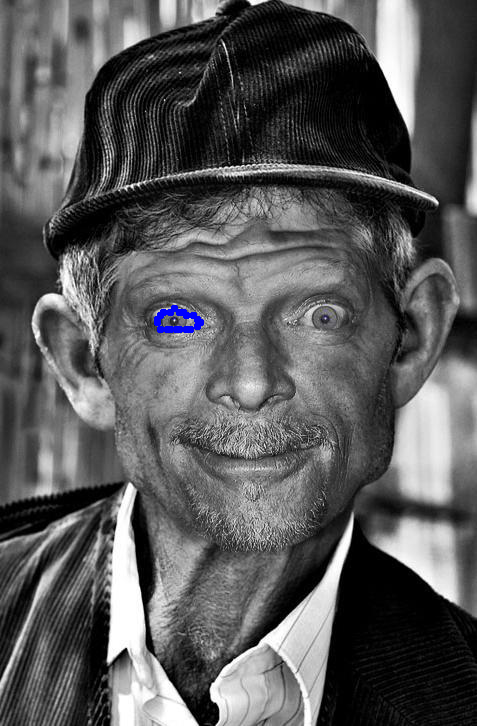

In [8]:
COUNT_POINTS = 194
row = df_predictions.loc[20]
img = Image.open(os.path.join(DIR_TEST_IMAGES, row['file_name']))
draw = ImageDraw.Draw(img)

r = 3
coord_landmarks = []
# for id_point in range(COUNT_POINTS):
for id_point in points_l_eye:
    name_x = F"Point_M{id_point}_X"
    name_y = F"Point_M{id_point}_Y"
    coord_landmarks.append([row[name_x], row[name_y]]) 
for coord in coord_landmarks:
    x, y = coord
    draw.ellipse((x-r, y-r, x+r, y+r), fill=(0,0,255,0))
img

In [18]:
df_submit = []
for idx, row in test_points.iterrows():
    file_name = row[0]    
    point_index_list = np.array(eval(row[1]))
    
    points_for_image = df_predictions[df_predictions['file_name']==file_name]
    row_submit = dict()
    row_submit['file_name'] = file_name
    for i, idx_point in enumerate(point_index_list):
        row_submit[f'Point_M{i}_X'] = points_for_image[f'Point_M{idx_point}_X'].iloc[0]
        row_submit[f'Point_M{i}_Y'] = points_for_image[f'Point_M{idx_point}_Y'].iloc[0]
    df_submit.append(row_submit)

In [20]:
df_submit = pd.DataFrame(df_submit)

In [34]:
df_submit.to_csv('mse_relu_99_predict.csv', index=False)

In [22]:
df_submit.to_csv('mse_relu_base_submit.csv', index=False)

,filename,point_index_list
0,296814969_3.jpg,"[20, 160, 1, 77, 158, 101, 131, 165, 68, 68, 4..."
1,2968560214_1.jpg,"[10, 93, 48, 129, 155, 108, 70, 111, 58, 116, ..."
2,2968784797_1.jpg,"[83, 49, 133, 94, 186, 137, 170, 139, 69, 182,..."
3,296961468_1.jpg,"[134, 104, 81, 175, 133, 38, 136, 12, 114, 9, ..."
4,2970690152_2.jpg,"[192, 192, 191, 130, 5, 44, 59, 58, 105, 63, 1..."
...,...,...
325,3260548295_1.jpg,"[137, 7, 83, 11, 113, 128, 124, 134, 156, 176,..."
326,3260548295_2.jpg,"[149, 107, 153, 184, 112, 87, 60, 186, 150, 18..."
327,3261640996_1.jpg,"[121, 70, 29, 46, 28, 161, 32, 56, 47, 156, 16..."
328,3262777136_1.jpg,"[7, 118, 89, 34, 8, 149, 84, 49, 96, 115, 15, ..."


In [10]:
df_best = pd.read_csv('best_predict.csv')

In [21]:
df_submit

,file_name,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,...,Point_M25_X,Point_M25_Y,Point_M26_X,Point_M26_Y,Point_M27_X,Point_M27_Y,Point_M28_X,Point_M28_Y,Point_M29_X,Point_M29_Y
0,296814969_3.jpg,430,558,514,289,283,411,466,488,500,...,283,411,484,463,543,302,414,474,351,323
1,2968560214_1.jpg,570,745,343,713,358,638,235,419,287,...,546,442,602,713,438,697,343,845,275,682
2,2968784797_1.jpg,1809,2490,1566,2153,1256,1519,1552,2449,2227,...,1620,2153,1917,1100,1701,2314,1917,1100,1310,2517
3,296961468_1.jpg,1350,1288,1560,1830,1425,1912,1364,1119,1628,...,1906,1552,1560,1735,1771,1952,1323,1180,896,1749
4,2970690152_2.jpg,850,613,850,613,863,613,671,626,1009,...,635,557,716,1045,671,1032,703,873,811,886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,3260548295_1.jpg,1059,738,1091,1059,966,1045,1024,1127,988,...,806,702,1038,759,848,688,923,1199,806,973
326,3260548295_2.jpg,410,413,482,560,434,409,350,379,443,...,499,582,473,582,438,472,412,413,397,396
327,3261640996_1.jpg,955,619,962,876,1030,969,795,830,1016,...,681,634,788,759,620,627,802,933,927,876
328,3262777136_1.jpg,402,441,230,270,291,425,143,392,390,...,215,433,302,509,378,266,201,492,357,258


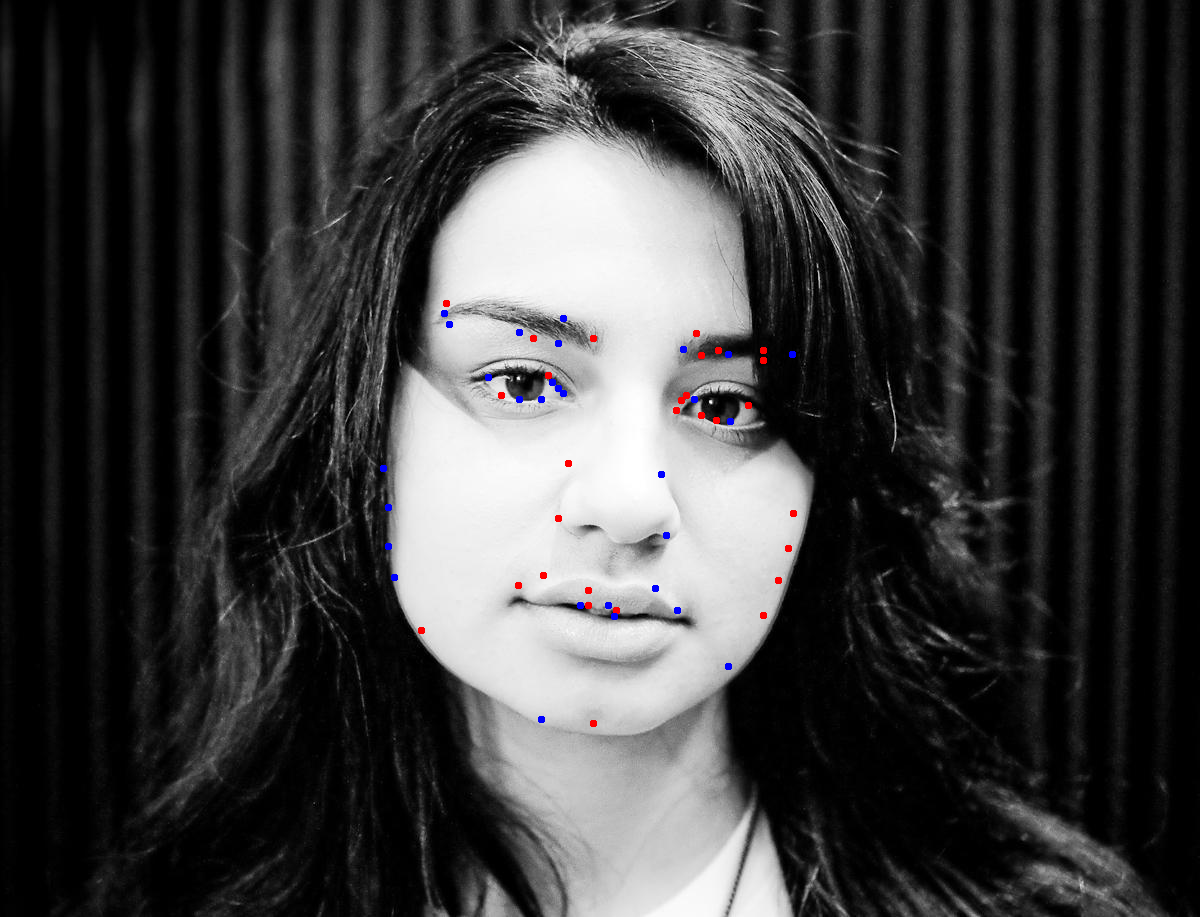

In [28]:
COUNT_POINTS = 30
id_image = 300
row = df_submit.loc[id_image]

img = Image.open(os.path.join(DIR_TEST_IMAGES, row['file_name']))
draw = ImageDraw.Draw(img)
row_best = df_best.loc[id_image]

r = 3
coord_landmarks = []
best_coord_landmarks= []
for id_point in range(COUNT_POINTS):
# for id_point in points_l_eye:
    name_x = F"Point_M{id_point}_X"
    name_y = F"Point_M{id_point}_Y"
    coord_landmarks.append([row[name_x], row[name_y]]) 
    best_coord_landmarks.append([row_best[name_x], row_best[name_y]]) 
for coord, best_coord in zip(coord_landmarks, best_coord_landmarks):
    x, y = coord
    x_best, y_best = best_coord
    draw.ellipse((x-r, y-r, x+r, y+r), fill=(0,0,255,0))
    draw.ellipse((x_best-r, y_best-r, x_best+r, y_best+r), fill=(255,0,0,0))
img